In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np
hfont = {'fontname':'Times New Roman'}
import seaborn as sns


In [2]:
def subcategorybar(X, vals, my_colors,lab, width=0.4):
    plt.figure(figsize=(15,10))
    plt.grid(axis = 'y')
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tick_params(
        axis='x',         
        which='both',      
        bottom=False,     
        top=False,         
        labelbottom=True)

    plt.tick_params(
        axis='y',       
        which='both',      
        left=False,      
        top=False,        
        labelleft=True) 
    plt.xticks(fontsize= 16, **hfont)
    
    n = len(vals)
    _X = np.arange(len(X))

    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", color=my_colors[i], label=lab[i])   
    plt.xticks(_X, X)
    plt.yticks([i for i in range(0,101, 10)])

In [3]:
df = pd.read_excel('./methods_parameters.xlsx')
df

,PUT,PUT_clause_complexity,PUT_cyclomatic_complexity,path_clause_complexity,PUT_cyclomatic_complexity.1,mcmc_percision,mcmc_New/all_try,mcm_bounary,Ip-prt_percision,Ip-prt_New/all_try,Ip-prt_boundary,prt_percision,prt_New/all_try,prt_boundary,DART_percision,DART_New/all_try,DART_boundary,DMART_percision,DMART_New/all_try,DMART_boundary
0,Armstrong_number,4.2,3.0,4.2,3,100.0,100,92,100,100,88,83,83,70,74,NaN,79,86,NaN,91
1,bisection,4.8,5.0,4.8,4,95.0,92,94,88,88,91,70,68,84,62,NaN,84,80,NaN,92
2,decimal_to_any,11.5,10.0,6.3,4,86.0,77,86,73,73,92,66,61,77,53,NaN,91,68,NaN,84
3,reminder,7.8,14.0,7.0,11,67.0,60,57,62,62,43,57,56,23,50,NaN,40,59,NaN,57
4,expint,25.0,7.9,4.9,5,99.0,84,88,84,84,88,80,78,59,47,NaN,81,53,NaN,88
5,gammaq,10.0,8.3,4.6,5,95.0,95,63,71,71,53,66,66,34,44,NaN,50,50,NaN,61
6,gcd,6.0,2.4,9.8,8,79.0,58,97,54,54,95,51,51,87,44,NaN,89,47,NaN,93
7,check triangle,4.5,6.0,6.0,7,90.0,66,92,57,57,95,81,511,79,40,NaN,81,44,NaN,91
8,scipy,290.0,367.6,10.7,9,73.5,70,53,62,62,42,48,40,21,38,NaN,37,40,NaN,50
9,mpmath,383.0,433.2,12.0,8,77.0,69,67,66,66,60,53,45,50,37,NaN,54,40,NaN,65


In [4]:
df.columns

Index(['PUT', 'PUT_clause_complexity', 'PUT_cyclomatic_complexity',
       'path_clause_complexity', 'PUT_cyclomatic_complexity.1',
       'mcmc_percision', 'mcmc_New/all_try', 'mcm_bounary', 'Ip-prt_percision',
       'Ip-prt_New/all_try', 'Ip-prt_boundary', 'prt_percision',
       'prt_New/all_try', 'prt_boundary', 'DART_percision', 'DART_New/all_try',
       'DART_boundary', 'DMART_percision', 'DMART_New/all_try',
       'DMART_boundary'],
      dtype='object')

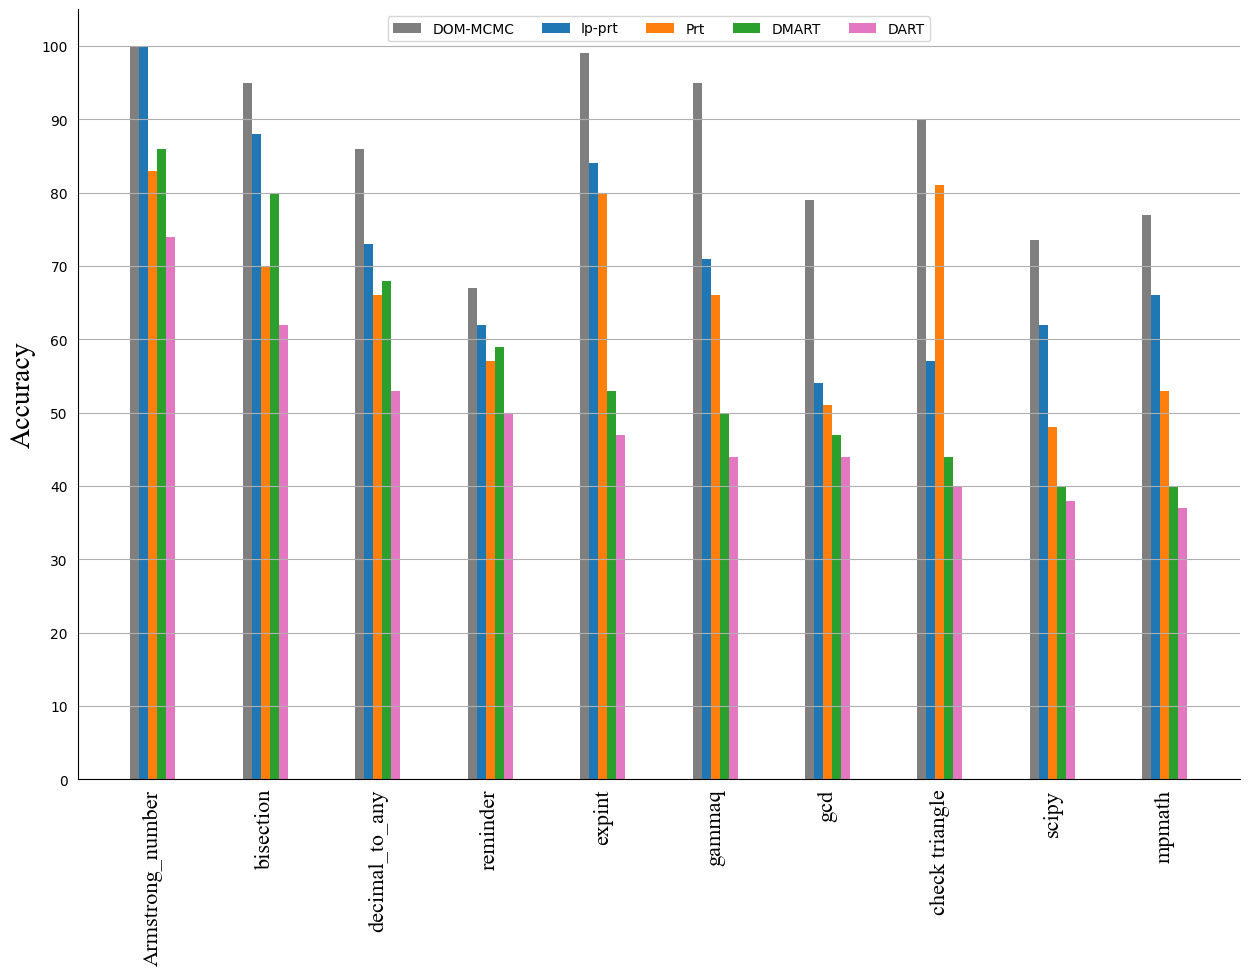

In [5]:
# plot each PUT and coverage
labels = list(df["PUT"])

mcmc_percision = list(df["mcmc_percision"])
Ip_prt_percision = list(df["Ip-prt_percision"])
prt_percision = list(df["prt_percision"])
dart_percision = list(df["DART_percision"])
dmart_percision = list(df["DMART_percision"])

my_colors = ["tab:gray", "tab:blue", "tab:orange", "tab:green", "tab:pink"]
lab=['MCMC-DOM', 'Ip-prt', 'Prt', 'DMART', 'DART']

   
subcategorybar(labels[0:10],[mcmc_percision[0:10],Ip_prt_percision[0:10],prt_percision[0:10], dmart_percision[0:10], dart_percision[0:10]], my_colors, lab)
plt.xticks(rotation = 90, fontsize= 16, **hfont)
plt.ylabel("Accuracy", fontsize= 20, **hfont)
plt.legend(loc='upper center', ncol=len(lab))
plt.savefig("./report/percision.jpg", bbox_inches='tight')
plt.show()


# average for each method

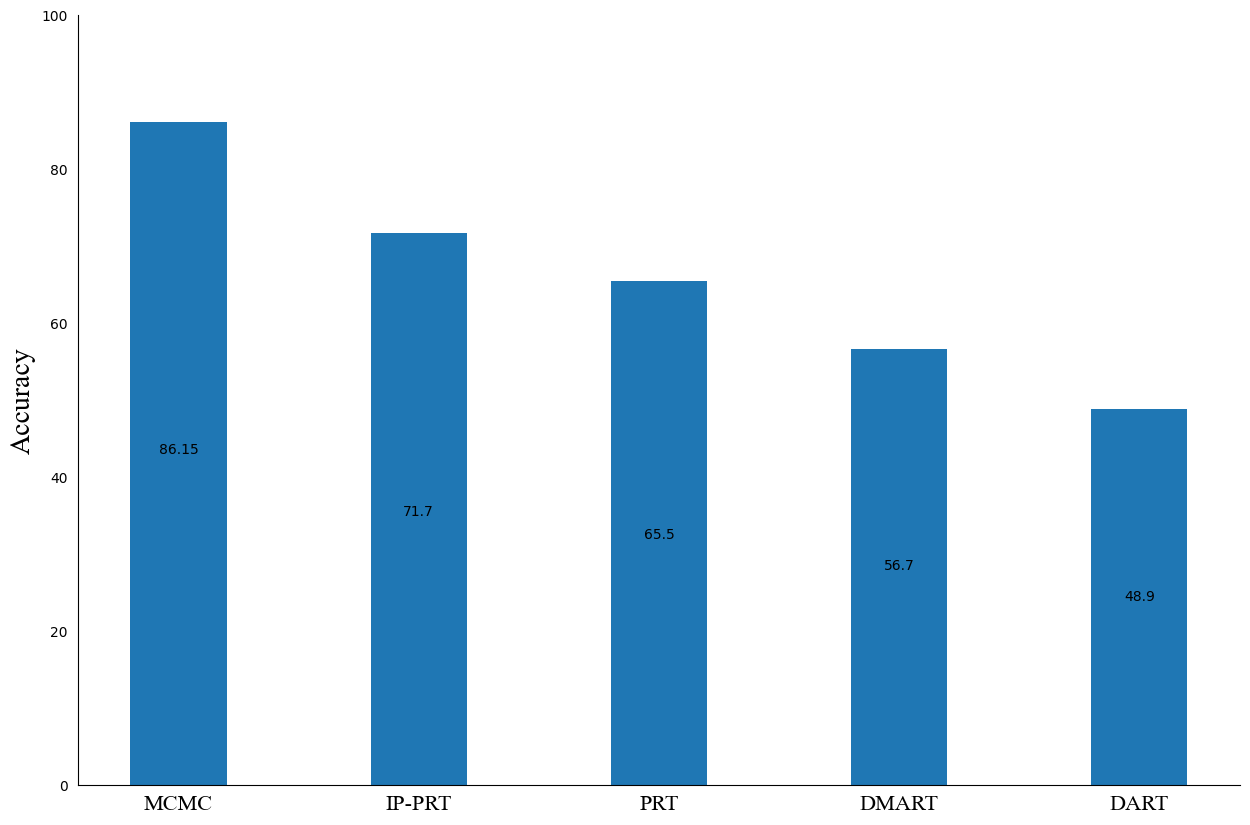

In [6]:
mcmc = df["mcmc_percision"].mean()
ip_prt = df["Ip-prt_percision"].mean()
prt = df["prt_percision"].mean()
dmart = df["DMART_percision"].mean()
dart = df["DART_percision"].mean()

val = [mcmc, ip_prt, prt, dmart, dart]
lable = ['MCMC-DOM', 'IP-PRT', 'PRT', 'DMART', 'DART']

plt.figure(figsize=(15,10))
plt.bar(lable, val, width = 0.4)
plt.xticks(fontsize= 16, **hfont)
plt.ylabel("Accuracy", fontsize= 20, **hfont)
plt.yticks([i for i in range(0,101, 20)])
# plt.grid(axis = 'y')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

for i in range(len(val)):
    plt.text(i, val[i]//2, float("{:.2f}".format(val[i])),ha = 'center')

    plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,        
    labelbottom=True)
plt.tick_params(
    axis='y',          
    which='both',     
    left=False,      
    top=False,     
    labelleft=True) 
plt.savefig("./report/percent_method.jpg", bbox_inches='tight')
plt.show()


# complexity versus accuracy

In [7]:
sns.set(font="Times New Roman")
sns.set_style("whitegrid")
df1 = pd.read_excel("./report1.xlsx")
df1

,Clause Complexity,Method,Cyclomatic Complexity,accuracy
0,4.2,MCMC,3,100.0
1,4.8,MCMC,4,95.0
2,6.3,MCMC,4,86.0
3,7.0,MCMC,11,67.0
4,4.9,MCMC,5,99.0
5,4.6,MCMC,5,95.0
6,9.8,MCMC,8,79.0
7,6.0,MCMC,7,90.0
8,10.7,MCMC,9,73.5
9,12.0,MCMC,8,77.0


/home/roshan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


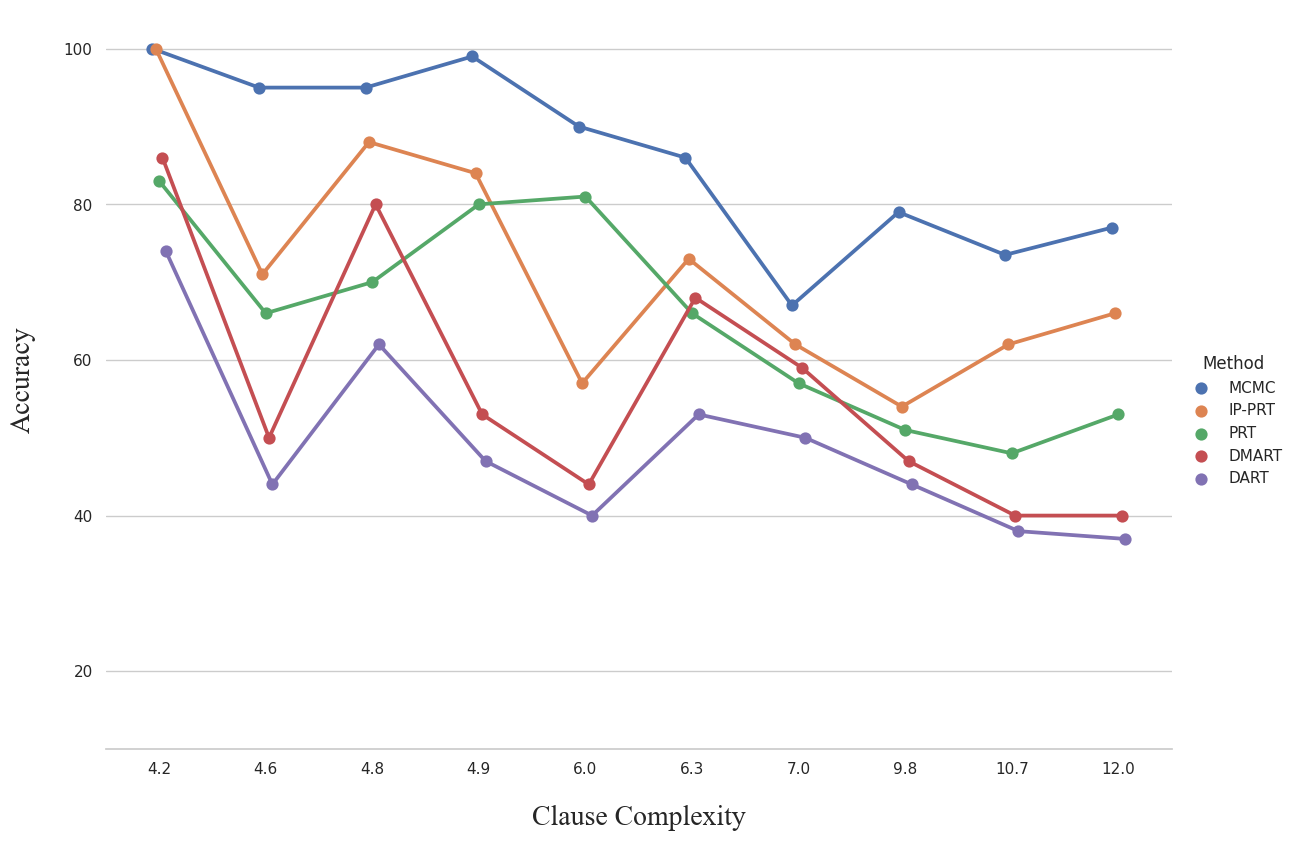

In [8]:
g = sns.catplot(x="Clause Complexity", y="accuracy", hue="Method", capsize=.1, height=8.27, aspect=11.7/8.27,kind="point", data=df1, dodge=True)
plt.ylim(10, 105)
plt.xlabel("Clause Complexity", fontsize=20,**hfont,labelpad = 20)
plt.ylabel("Accuracy", fontsize=20,**hfont,labelpad = 20)
plt.savefig("./report/clause.jpg", bbox_inches='tight')
g.despine(left=True)

/home/roshan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


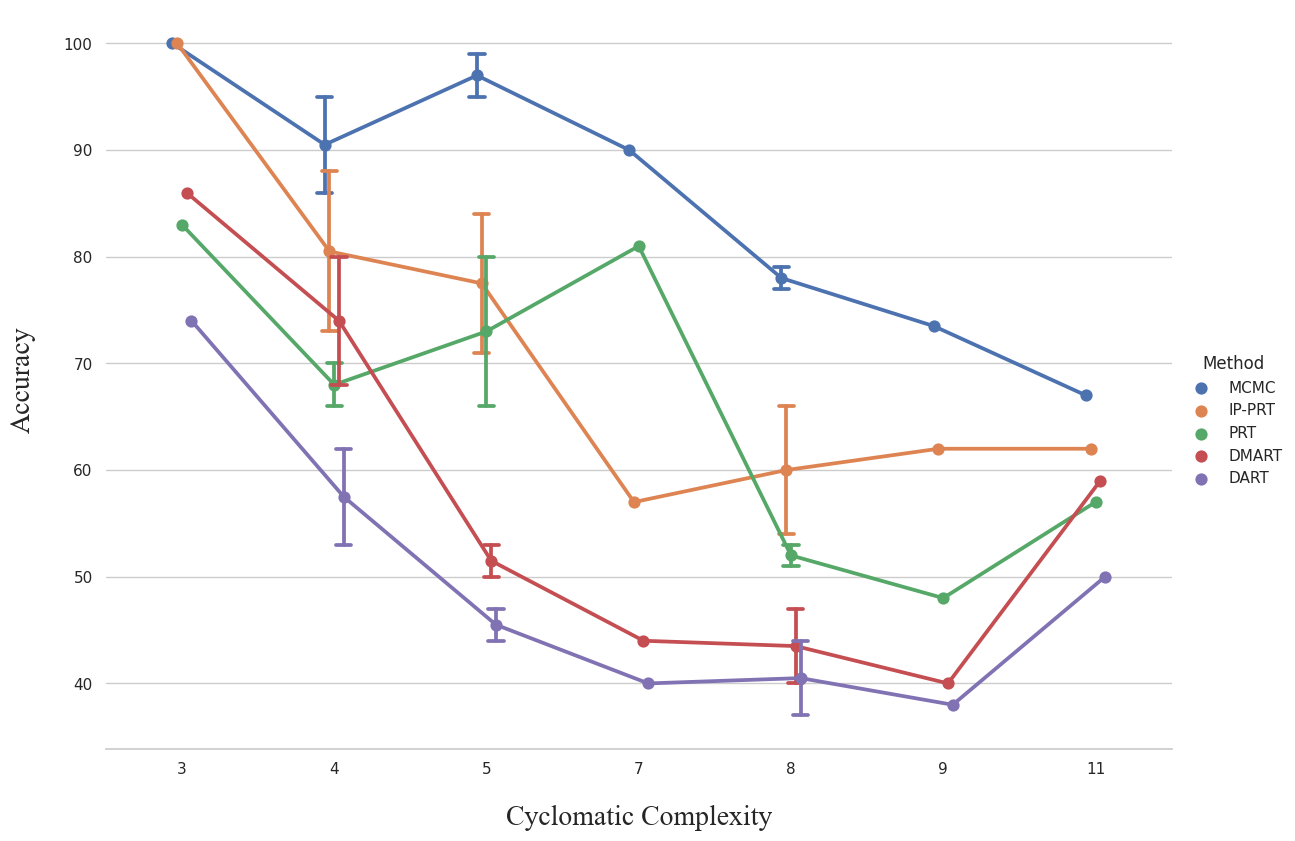

In [9]:
g = sns.catplot(x="Cyclomatic Complexity", y="accuracy",  hue="Method", capsize=.1, height=8.27, aspect=11.7/8.27,kind="point", data=df1, dodge=True)
plt.xlabel("Cyclomatic Complexity", fontsize=20,**hfont,labelpad = 20)
plt.ylabel("Accuracy", fontsize=20,**hfont,labelpad = 20)
#plt.ylim(10, 105)
plt.savefig("./report/cyclomatic.jpg", bbox_inches='tight')
g.despine(left=True)


# 

# Boundry

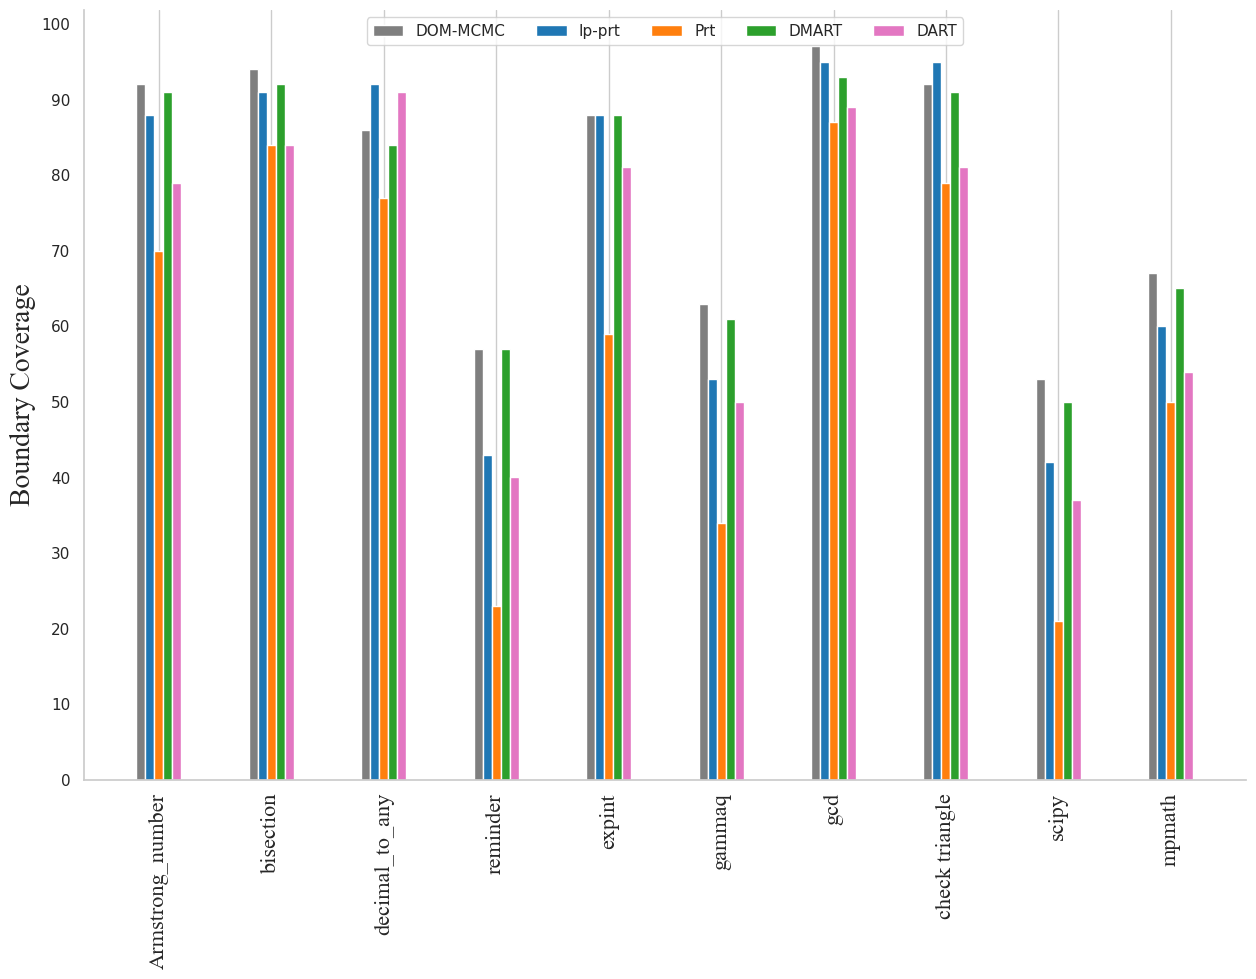

In [10]:
labels = list(df["PUT"])

mcmc_percision = list(df["mcm_bounary"])
Ip_prt_percision = list(df["Ip-prt_boundary"])
prt_percision = list(df["prt_boundary"])
DMART_percision = list(df["DMART_boundary"])
DART_percision = list(df["DART_boundary"])

my_colors = ["tab:gray", "tab:blue", "tab:orange", "tab:green", "tab:pink"]
lab=['MCMC-DOM', 'Ip-prt', 'Prt', 'DMART', 'DART']

   
subcategorybar(labels[0:10],[mcmc_percision[0:10],Ip_prt_percision[0:10],prt_percision[0:10], DMART_percision[0:10], DART_percision[0:10]], my_colors, lab)

plt.xticks(rotation = 90, fontsize= 16, **hfont)
plt.ylabel("Boundary Coverage", fontsize= 20, **hfont)
plt.legend(loc='upper center', ncol=len(lab))
plt.savefig("./report/bounadry.jpg", bbox_inches='tight')
plt.show()

# Mutation score

In [ ]:
df_mu = pd.read_csv("./mutation_score.csv")
df_mu

In [ ]:
labels = list(df_mu["PUT"])
evo = list(df_mu["evo_pynguin"])
mcmc =  list(df_mu["mcmc"])
aco =  list(df_mu["aco"])

my_colors = ["tab:blue", "tab:gray", "tab:orange"]
lab = ["Evosuit(pynguin)", "ACO-AR-SP", "MCMC-DOM"]
subcategorybar(list(labels), [evo,aco,mcmc], my_colors, lab,width=0.5)
plt.xticks(rotation = 90, fontsize= 16, **hfont)
plt.ylabel("Mutation Score", fontsize= 20, **hfont)
plt.legend(loc='upper center', ncol=len(lab))
plt.savefig("./report/mutation_score_compare.jpg", bbox_inches='tight')
plt.show()



In [ ]:
fig = plt.figure(figsize =(10, 7))

data = [df_mu["evo_pynguin"], df_mu["mcmc"], df_mu["aco"]] 
plt.figure(figsize=(15,10))
plt.grid(axis = 'y')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tick_params(
    axis='x',         
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=True)

plt.tick_params(
    axis='y',       
    which='both',      
    left=False,      
    top=False,        
    labelleft=True) 
plt.xticks(fontsize= 16, **hfont)
plt.ylim(20, 100)
bp = plt.boxplot(data, patch_artist=True,labels=['Evosuit(pynguin)', 'MCMC-DOM', 'ACO-AR-SP'])

for flier in bp['fliers']: flier.set(marker ='D', color ='#e7298a', alpha = 0.5) 
for median in bp['medians']: median.set(color ='green', linewidth = 3) 
colors = ["tab:gray", "tab:blue", "tab:orange"]
i = 0
for box in bp['boxes']:
    box.set(color=colors[i], linewidth=5)
    i += 1
plt.ylabel("Mutation Score", fontsize= 20, **hfont)
plt.savefig("./report/mu_box.jpg", bbox_inches='tight')

In [ ]:
import os
import csv
from scipy import stats
csv_files = os.listdir("./mu_report")
with open("./report/mutation_sign.csv", 'w') as f:
    fieldnames = ['PUT', 'mcmc-evo', 'mcmc-aco']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    for i in csv_files:
        csv_df = pd.read_csv("./mu_report/" + i)
        ge_ev = stats.wilcoxon(csv_df["mcmc"], csv_df["evo"])[1]
        ge_ac = stats.wilcoxon(csv_df["mcmc"], csv_df["aco"])[1]
        writer.writerow({'PUT': i[:-4] ,'mcmc-evo': ge_ev, 'mcmc-aco': ge_ac})
